This notebook uses Bayesian appraoch to fit the parameters of 1D and 2D normal distributions, respectively.

In [54]:
import numpy as np
import pymc3 as pm
import scipy.stats
import theano.tensor as tt

import matplotlib.pyplot as plt
import matplotlib
from plot_functions import *
%matplotlib inline
matplotlib.style.use('ggplot')


### 1D Gaussian

In [66]:
true_mu = 3
true_sigma = 1
n_points = 30
data = np.random.normal(loc=true_mu, scale=true_sigma, size=n_points)

In [67]:
BURN_IN_STEPS = 1000
MCMC_STEPS = 1000

with pm.Model() as model:
    mu = pm.Normal('mu', 0.0, sd=10.0)
    sigma = pm.ChiSquared('sigma', nu=3)
    
    x = pm.Normal('x', mu=mu, sd=sigma, observed=data)
    
    trace = pm.sample(BURN_IN_STEPS+MCMC_STEPS)  #, start=start, step=pm.NUTS())
    trace = trace[BURN_IN_STEPS:]
    

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 2500/2500 [00:01<00:00, 1550.00it/s]


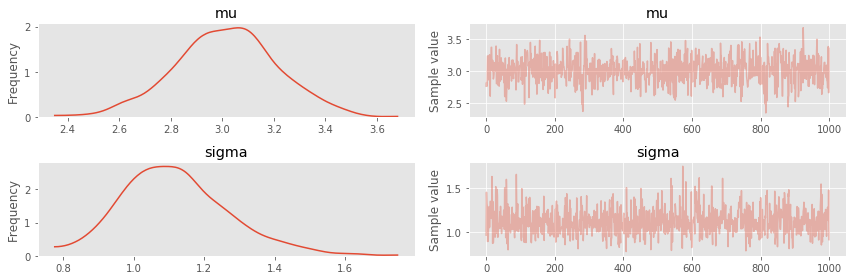

In [68]:
_ = pm.traceplot(trace)

### 2D Gaussian

In [102]:
true_mu = [1.0, 2.5]
true_sigma = np.eye(2) #[[1.0, 0.0], [0.0, 1.0]]
n_points = 100
data = scipy.stats.multivariate_normal(mean=true_mu, cov=true_sigma).rvs(size=n_points)

In [103]:
BURN_IN_STEPS = 1000
MCMC_STEPS = 2000

with pm.Model() as model:
    mu = pm.Normal('mu', 0.0, sd=10.0, shape=2)
    
    x = pm.MvNormal('x', mu=mu, cov=true_sigma, shape=(len(data), 2), observed=data)
    
    trace = pm.sample(BURN_IN_STEPS+MCMC_STEPS)
    trace = trace[BURN_IN_STEPS:]
    

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
100%|██████████| 3500/3500 [00:04<00:00, 769.90it/s]


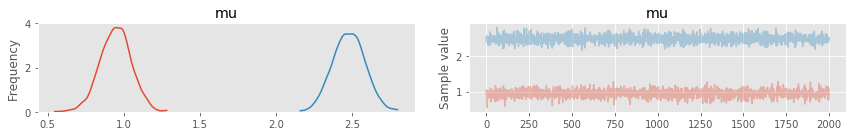

In [104]:
_ = pm.traceplot(trace)

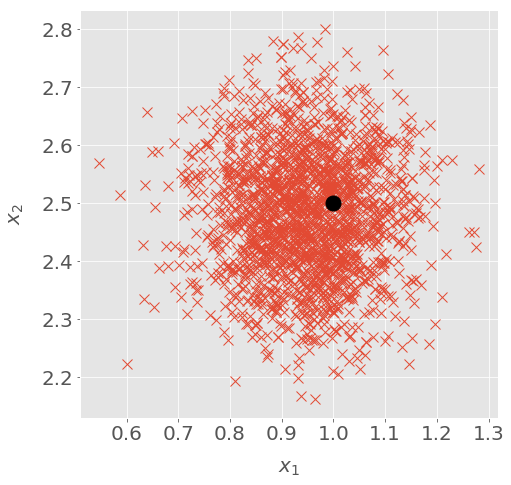

In [105]:
FONTSIZE = 20
plt.close('all')
fig, ax = plt.subplots(1, figsize=(7.5, 7.5))
_ = ax.plot(trace['mu'][:,0], trace['mu'][:, 1], lw=0, marker='x', markersize=10)
_ = ax.plot(true_mu[0], true_mu[1], lw=0, marker='o', markersize=15, color='k')
ax.set_xlabel(r'$x_1$', fontsize=FONTSIZE, labelpad=15)
ax.set_ylabel(r'$x_2$', fontsize=FONTSIZE, labelpad=15)
adjustAxeProperties(ax, FONTSIZE, 0, FONTSIZE, 0)